In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('student_performance.csv')
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


## PREPROCESSING DATA

__Checking Missing Values__

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


No missing values for all columns

__Checking Duplicate Values__

In [4]:
df.duplicated().sum()

127

In [5]:
df = df.drop_duplicates()

There are 127 Duplicate Values, we can drop them all

__One Hot Encoding__

In [6]:
onehot = ['Extracurricular Activities']
pd.get_dummies(df[onehot])

,Extracurricular Activities_No,Extracurricular Activities_Yes
0,False,True
1,True,False
2,False,True
3,False,True
4,True,False
...,...,...
9995,False,True
9996,False,True
9997,False,True
9998,False,True


Do one hot encoding to 'Extracurricular Activities' for later modeling, but the data type still boolean.. we can convert it to binary later

In [7]:
df = df.join(pd.get_dummies(df[onehot]))

In [8]:
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index,Extracurricular Activities_No,Extracurricular Activities_Yes
0,7,99,Yes,9,1,91.0,False,True
1,4,82,No,4,2,65.0,True,False
2,8,51,Yes,7,2,45.0,False,True
3,5,52,Yes,5,2,36.0,False,True
4,7,75,No,8,5,66.0,True,False
...,...,...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0,False,True
9996,7,64,Yes,8,5,58.0,False,True
9997,6,83,Yes,8,5,74.0,False,True
9998,9,97,Yes,7,0,95.0,False,True


Joining the one hot encoding to the dataframe

In [9]:
df.drop('Extracurricular Activities', axis=1, inplace=True)

Drop the original column, because we have done one hot encoding

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9873 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     9873 non-null   int64  
 1   Previous Scores                   9873 non-null   int64  
 2   Sleep Hours                       9873 non-null   int64  
 3   Sample Question Papers Practiced  9873 non-null   int64  
 4   Performance Index                 9873 non-null   float64
 5   Extracurricular Activities_No     9873 non-null   bool   
 6   Extracurricular Activities_Yes    9873 non-null   bool   
dtypes: bool(2), float64(1), int64(4)
memory usage: 482.1 KB


Checking data after dropping duplicated data from 1000 columns to 9873 column, and checking data type

In [11]:
new_column_order = ['Hours Studied', 'Previous Scores', 'Extracurricular Activities_No','Extracurricular Activities_Yes', 'Sleep Hours','Sample Question Papers Practiced', 'Performance Index']
df = df.reindex(columns=new_column_order)
df

,Hours Studied,Previous Scores,Extracurricular Activities_No,Extracurricular Activities_Yes,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,False,True,9,1,91.0
1,4,82,True,False,4,2,65.0
2,8,51,False,True,7,2,45.0
3,5,52,False,True,5,2,36.0
4,7,75,True,False,8,5,66.0
...,...,...,...,...,...,...,...
9995,1,49,False,True,4,2,23.0
9996,7,64,False,True,8,5,58.0
9997,6,83,False,True,8,5,74.0
9998,9,97,False,True,7,0,95.0


rearrange the column order

In [12]:
df.drop('Extracurricular Activities_No', axis=1, inplace=True)

Dropping 'Extracurricular Activities_No' column because we just need 1 column for modelling

In [13]:
df.rename(columns={'Extracurricular Activities_Yes' : 'Extracurricular Activities'}, inplace=True)

In [14]:
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,True,9,1,91.0
1,4,82,False,4,2,65.0
2,8,51,True,7,2,45.0
3,5,52,True,5,2,36.0
4,7,75,False,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,True,4,2,23.0
9996,7,64,True,8,5,58.0
9997,6,83,True,8,5,74.0
9998,9,97,True,7,0,95.0


Change column name : 'Extracurricular Activities_Yes' to 'Extracurricular Activities'

In [15]:
df = df.astype({'Extracurricular Activities': 'int64'})

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9873 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     9873 non-null   int64  
 1   Previous Scores                   9873 non-null   int64  
 2   Extracurricular Activities        9873 non-null   int64  
 3   Sleep Hours                       9873 non-null   int64  
 4   Sample Question Papers Practiced  9873 non-null   int64  
 5   Performance Index                 9873 non-null   float64
dtypes: float64(1), int64(5)
memory usage: 539.9 KB


change data type 'Extracurricular Activities' from boolean to integer

## Unvariate Analysis

__Boxplot to detect outlier__

In [17]:
nums = ['Hours Studied', 'Previous Scores','Extracurricular Activities', 'Sleep Hours','Sample Question Papers Practiced', 'Performance Index']

Grouping columns according to data type

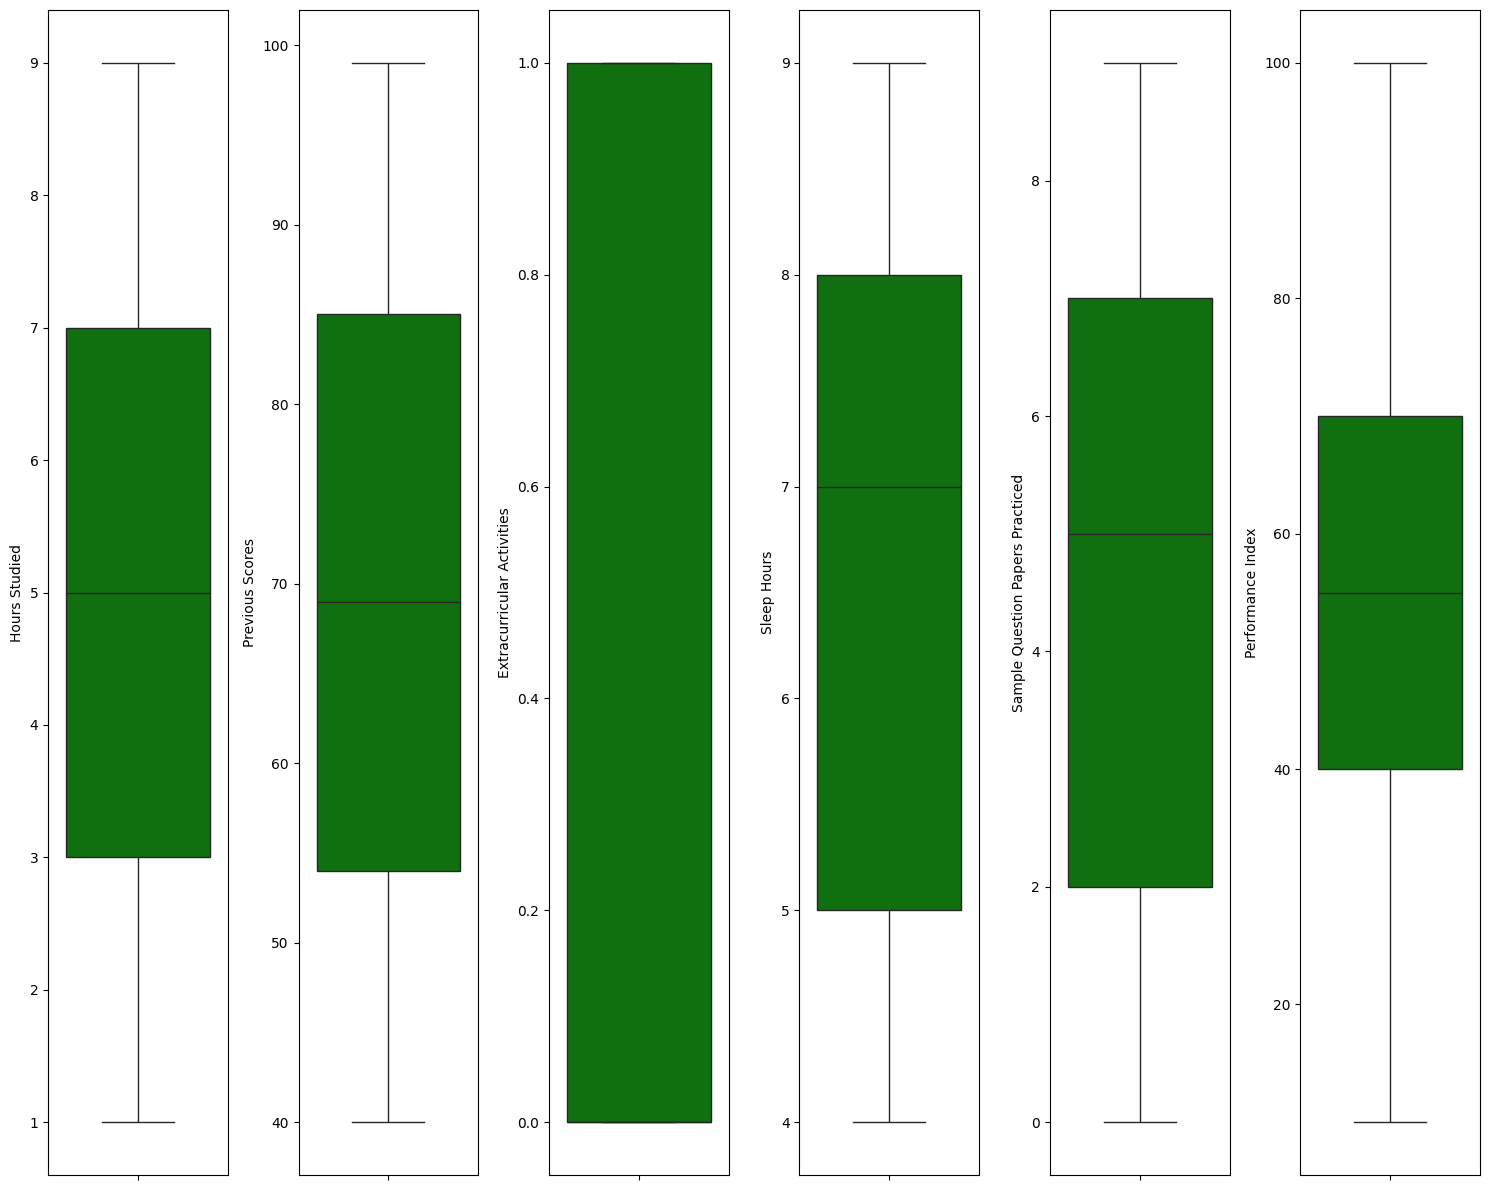

In [18]:
plt.figure(figsize=(15,12))
features = nums
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]], color='green')
    plt.tight_layout()

No outlier for all columns

__KDE plot for knowing the distribution form__

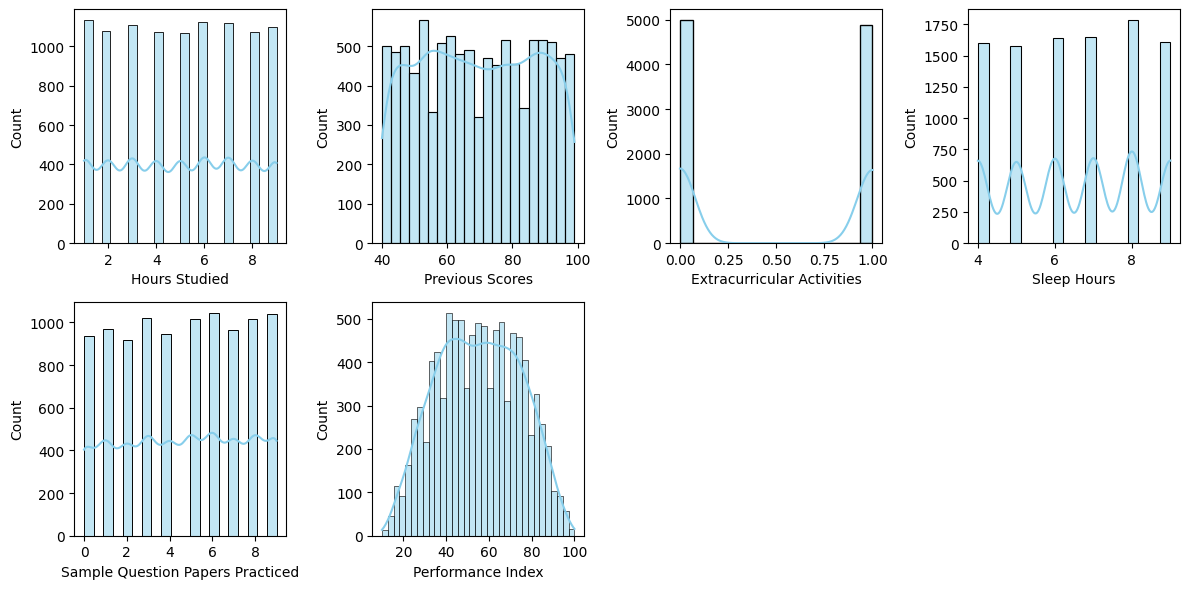

In [19]:
plt.figure(figsize=(12,6))

features = nums
for i in range(0, len(features)):
    plt.subplot(2, len(features)//2 + 1, i+1)
    sns.histplot(x=df[features[i]], color='skyblue', kde=True) # revised, histogram + kde
    plt.xlabel(features[i])
    plt.tight_layout()

1. Our target modelling (Performance Index) have normal distribution
2. The imbalance of 'Extracurricular Activities' still ok because the value is binary (1 & 0)
3. And The other have good distribution

## Bivariate Analysis

__HEATMAP CORRELATION__

In [20]:
df.corr()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
Hours Studied,1.000000,-0.010676,0.004899,0.002131,0.015740,0.375332
Previous Scores,-0.010676,1.000000,0.009534,0.007975,0.008719,0.915135
Extracurricular Activities,0.004899,0.009534,1.000000,-0.024008,0.013839,0.026075
Sleep Hours,0.002131,0.007975,-0.024008,1.000000,0.004907,0.050352
Sample Question Papers Practiced,0.015740,0.008719,0.013839,0.004907,1.000000,0.043436
Performance Index,0.375332,0.915135,0.026075,0.050352,0.043436,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

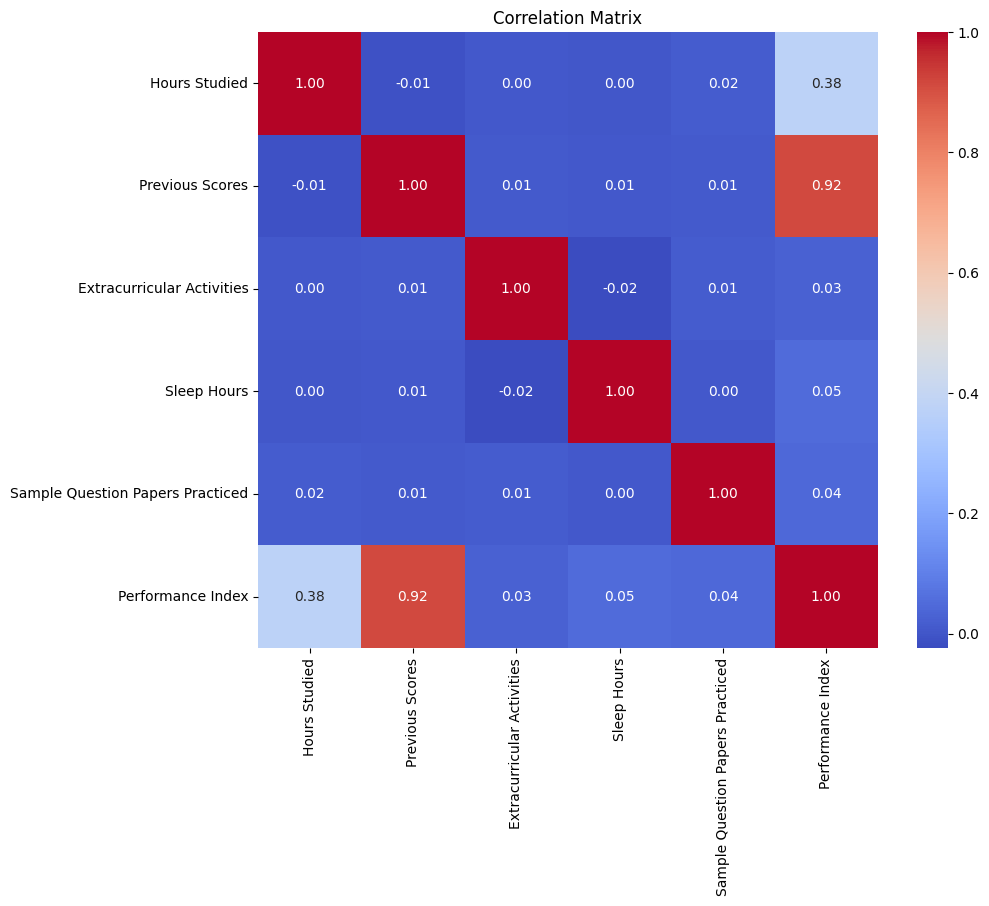

In [21]:
corr = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')

1. 'Previous Scores' and 'Performance Index' is the highest correlation
2. The second place that have high correlation with 'Performance Index' is 'Hours Studied'

__PAIRPLOT CORRELATION TO THE TARGET MODELLING__

<Figure size 2000x1500 with 0 Axes>

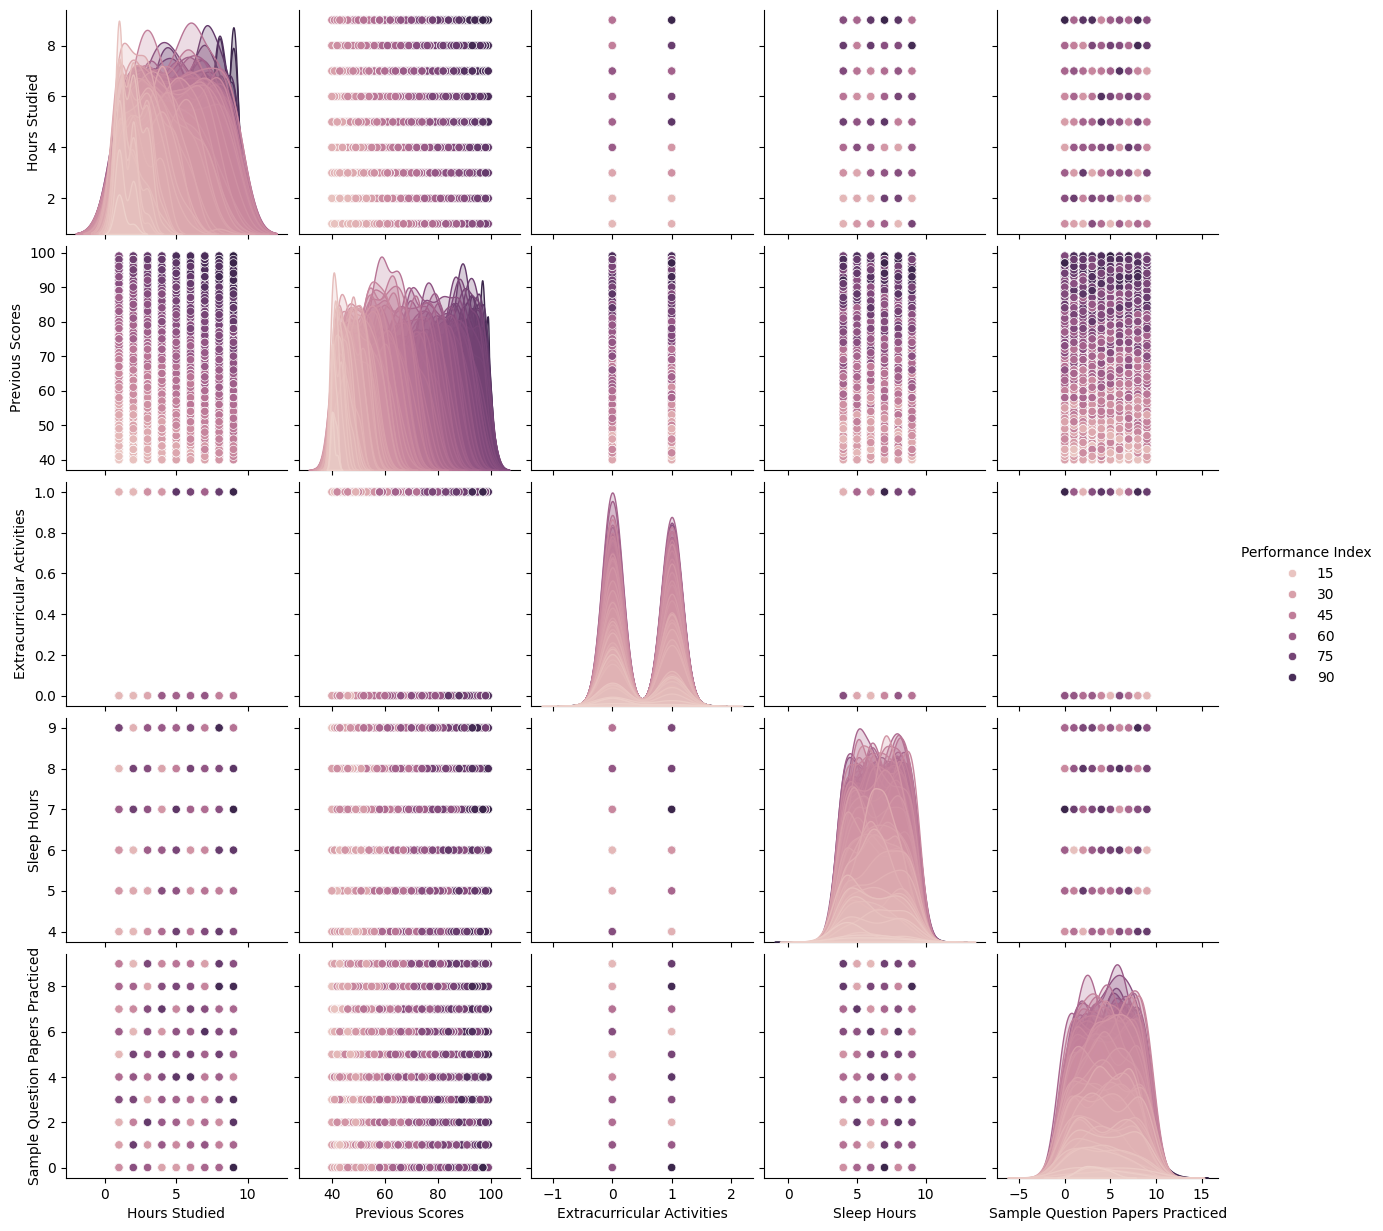

In [67]:
plt.figure(figsize=(20, 15))
sns.pairplot(df, hue='Performance Index')

1. Performance Index vs Hours Studied: There appears to be a positive correlation between the number of hours studied and performance on the test.
2. Performance Index vs Previous Scores: There is also a positive correlation between a student’s previous scores and their performance on the test.
3. Performance Index vs Extracurricular Activities: The relationship between extracurricular activities and performance on the test is less clear.
4. Performance Index vs Sleep Hours: The relationship between sleep hours and performance on the test is also unclear.
5. Performance Index vs Sample Question Papers Practiced: There appears to be a positive correlation between the number of sample question papers practiced and performance index.

## LINEAR REGRESSION MODELLING

__SPLITTING THE DATA__

Splitting data become : train | validate | test

In [22]:
# split train test
from sklearn.model_selection import train_test_split

feature = df.drop(columns='Performance Index')
target = df[['Performance Index']]

# First splitting: pretrain and test
feature_df_pretrain, feature_df_test, target_df_pretrain, target_df_test = train_test_split(feature, target, test_size=0.20, random_state=42)

# Second splitting: train and validation
feature_df_train, feature_df_validation, target_df_train, target_df_validation = train_test_split(feature_df_pretrain, target_df_pretrain, test_size=0.20, random_state=42)

Makes 'Performance Index' as a target to predicting the student performance

__Detect MULTICOLLINEARITY by computing Variance Inflation Factor (VIF)__

In [23]:
# calculate VIF scores for each feature
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif 
from statsmodels.tools.tools import add_constant

X = add_constant(feature_df_train)

vif_df = pd.DataFrame([vif(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

,feature,vif_score
1,Hours Studied,1.000534
2,Previous Scores,1.000576
3,Extracurricular Activities,1.000870
4,Sleep Hours,1.000389
5,Sample Question Papers Practiced,1.001442


VIF score looks good all the feature <4

__Training Linear Regression Model__

In [24]:
from sklearn.linear_model import LinearRegression

# define the model
multi_reg = LinearRegression()

# train the model
X_df_train = feature_df_train.to_numpy()
y_df_train = target_df_train.to_numpy()
y_df_train = y_df_train.reshape(len(y_df_train,))

multi_reg.fit(X_df_train, y_df_train)

LinearRegression()

__Interpreting the Obtained Model__

In [25]:
data = feature_df_train
model = multi_reg

coef_df = pd.DataFrame({
    'feature':['intercept'] + data.columns.tolist(),
    'coefficient':[model.intercept_] + list(model.coef_)
})

coef_df

,feature,coefficient
0,intercept,-34.172864
1,Hours Studied,2.847156
2,Previous Scores,1.020062
3,Extracurricular Activities,0.594131
4,Sleep Hours,0.481525
5,Sample Question Papers Practiced,0.193809


An increase of 1 point in Hours Studied, while the other features are kept fixed, is associated with an increase 2.847156 point in Performance Index

### DIAGNOSTIC THE MODEL

__Visualizing scatter plot to see residuals__

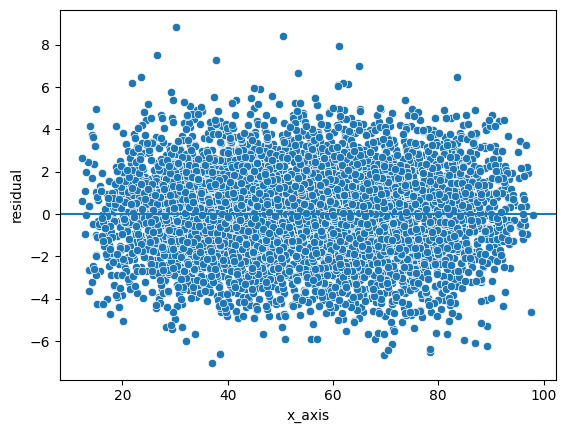

In [26]:
y_predict_train = multi_reg.predict(X_df_train)
residual = y_df_train - y_predict_train

df_resid = pd.DataFrame({
    'x_axis': y_predict_train,
    'residual': residual
})

sns.scatterplot(data=df_resid, x="x_axis", y="residual")
plt.axhline(0)
plt.show()

__Check normality assumption of the residuals__

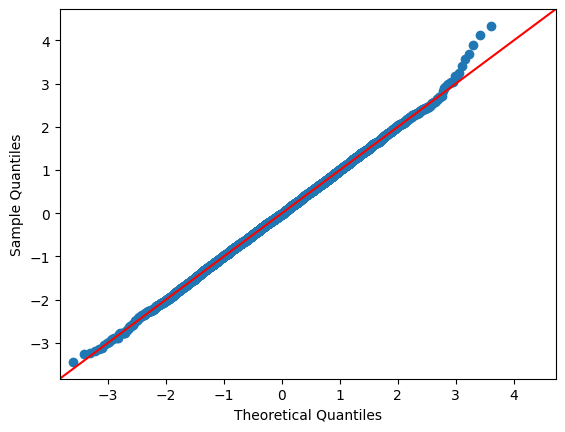

In [27]:
# QQplot
from sklearn.preprocessing import StandardScaler

std_resid = StandardScaler().fit_transform(residual.reshape(-1,1))
std_resid = np.array([value for nested_array in std_resid for value in nested_array])

import statsmodels.api as sm
sm.qqplot(std_resid, line='45')
plt.show()

### LINEAR REGRESSION MODEL EVALUATION

__TRAINING ERROR__

In [29]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print('R-squared for training data is {}'.format(r2_score(y_df_train, y_predict_train)))
print('RMSE for training data is {}'.format(np.sqrt(mean_squared_error(y_df_train, y_predict_train))))

R-squared for training data is 0.9887171949966627
RMSE for training data is 2.040587621090402


1. R-squared training data is 98%! successfully 
explained (modelled
2. The RMSE training error is good because RMSE value is low if we compare with the target values)

__Testing Error__

In [30]:
# prepare prediction result on test data
X_df_test = feature_df_test.to_numpy()
y_predict_test = multi_reg.predict(X_df_test)

# ground truth target
y_df_test = target_df_test.to_numpy()
y_df_test = y_df_test.reshape(len(y_df_test),)

In [31]:
from sklearn.metrics import mean_squared_error

print('RMSE for testing data is {}'.format(np.sqrt(mean_squared_error(y_df_test, y_predict_test))))

RMSE for testing data is 2.0741452930824273


The RMSE testing error is good because RMSE value is low if we compare with target values

## Training Ridge and Lasso Model

__Training Ridge Regression Model__

In [32]:
from sklearn.linear_model import Ridge

# train the model
X_df_train = feature_df_train.to_numpy()
y_df_train = target_df_train.to_numpy()
y_df_train = y_df_train.reshape(len(y_df_train),)

# define the model
ridge_reg = Ridge(alpha=0.1, 
                  random_state=42)

ridge_reg.fit(X_df_train, y_df_train)

Ridge(alpha=0.1, random_state=42)

__Interpreting the Obtained Model__

In [33]:
data = feature_df_train
model = ridge_reg

coef_df = pd.DataFrame({
    'feature':['intercept'] + data.columns.tolist(),
    'coefficient':[model.intercept_] + list(model.coef_)
})

coef_df

,feature,coefficient
0,intercept,-34.172790
1,Hours Studied,2.847149
2,Previous Scores,1.020062
3,Extracurricular Activities,0.594094
4,Sleep Hours,0.481522
5,Sample Question Papers Practiced,0.193809


An increase of 1 point in Hours Studied, while the other features are kept fixed, is associated with an increase 2.847149 point in Performance Index

__Training Lasso Regression Model__

In [34]:
from sklearn.linear_model import Lasso

# define the model
lasso_reg = Lasso(alpha=0.1,
                  random_state=42)

lasso_reg.fit(X_df_train, y_df_train)

Lasso(alpha=0.1, random_state=42)

__Interpreting the Obtained Model__

In [35]:
data = feature_df_train
model = lasso_reg

coef_df = pd.DataFrame({
    'feature':['intercept'] + data.columns.tolist(),
    'coefficient':[model.intercept_] + list(model.coef_)
})

coef_df

,feature,coefficient
0,intercept,-33.595261
1,Hours Studied,2.832864
2,Previous Scores,1.019782
3,Extracurricular Activities,0.193790
4,Sleep Hours,0.444826
5,Sample Question Papers Practiced,0.183436


An increase of 1 point in Hours Studied, while the other features are kept fixed, is associated with an increase 2.832864 point in Performance Index

## Choosing the best lambda for Ridge Regression and Lasso Regression

__Train multiple model of Ridge Regression with diffrent lambda__

In [36]:
from sklearn.linear_model import Ridge

# train the model
X_df_train = feature_df_train.to_numpy()
y_df_train = target_df_train.to_numpy()
y_df_train = y_df_train.reshape(len(y_df_train),)

# define the model
# 4 models with 4 different alphas (lambda)
ridge_reg_pointzeroone = Ridge(alpha=0.01, random_state=42)
ridge_reg_pointone = Ridge(alpha=0.1, random_state=42)
ridge_reg_one = Ridge(alpha=1, random_state=42)
ridge_reg_ten = Ridge(alpha=10, random_state=42)

# fit the model (training)
ridge_reg_pointzeroone.fit(X_df_train, y_df_train)
ridge_reg_pointone.fit(X_df_train, y_df_train)
ridge_reg_one.fit(X_df_train, y_df_train)
ridge_reg_ten.fit(X_df_train, y_df_train)

Ridge(alpha=10, random_state=42)

__Find best model of ridge regression from validation set__

In [37]:
from sklearn.metrics import mean_squared_error

X_df_validation = feature_df_validation.to_numpy()
y_df_validation = target_df_validation.to_numpy()
y_df_validation = y_df_validation.reshape(len(y_df_validation),)

alphas = [0.01, 0.1, 1., 10]
models = [ridge_reg_pointzeroone,
          ridge_reg_pointone,
          ridge_reg_one,
          ridge_reg_ten]

for model, alpha in zip(models, alphas):
    y_predict_validation = model.predict(X_df_validation)
    rmse = np.sqrt(mean_squared_error(y_df_validation,y_predict_validation))
    print(f'RMSE of Ridge regression model with alpha = {alpha} is {rmse}')

RMSE of Ridge regression model with alpha = 0.01 is 2.018492009642299
RMSE of Ridge regression model with alpha = 0.1 is 2.0184917307954677
RMSE of Ridge regression model with alpha = 1.0 is 2.018488959554841
RMSE of Ridge regression model with alpha = 10 is 2.0184629583054483


We can see that Ridge with alpha=10 has the smallest RMSE --> The best model

__Coefficient of the best ridge regression model with lambda__

Choose the smallest value based on RMSE

In [38]:
ridge_best = ridge_reg_ten

coef_df = pd.DataFrame({
    'feature':['intercept'] + feature_df_train.columns.tolist(),
    'coefficient':[ridge_best.intercept_] + list(ridge_best.coef_)
})

coef_df

,feature,coefficient
0,intercept,-34.165438
1,Hours Studied,2.846487
2,Previous Scores,1.020057
3,Extracurricular Activities,0.590396
4,Sleep Hours,0.481243
5,Sample Question Papers Practiced,0.193800


An increase of 1 point in Hours Studied, while the other features are kept fixed, is associated with an increase 2.846487 point in Performance Index

__Train multiple model of Lasso Regression with diffrent lambda__

In [40]:
from sklearn.linear_model import Lasso

# train the model
X_df_train = feature_df_train.to_numpy()
y_df_train = target_df_train.to_numpy()
y_df_train = y_df_train.reshape(len(y_df_train),)

# define the model
# 4 models with 4 different alphas (lambda)
lasso_reg_pointzeroone = Lasso(alpha=0.01, random_state=42)
lasso_reg_pointone = Lasso(alpha=0.1, random_state=42)
lasso_reg_one = Lasso(alpha=1, random_state=42)
lasso_reg_ten = Lasso(alpha=10, random_state=42)

# fit the model (training)
lasso_reg_pointzeroone.fit(X_df_train, y_df_train)
lasso_reg_pointone.fit(X_df_train, y_df_train)
lasso_reg_one.fit(X_df_train, y_df_train)
lasso_reg_ten.fit(X_df_train, y_df_train)

Lasso(alpha=10, random_state=42)

__Find best model of lasso regression from validation set__

In [41]:
from sklearn.metrics import mean_squared_error

X_df_validation = feature_df_validation.to_numpy()
y_df_validation = target_df_validation.to_numpy()
y_df_validation = y_df_validation.reshape(len(y_df_validation),)

alphas = [0.01, 0.1, 1., 10]
models = [lasso_reg_pointzeroone,
          lasso_reg_pointone,
          lasso_reg_one,
          lasso_reg_ten]

for model, alpha in zip(models, alphas):
    y_predict_validation = model.predict(X_df_validation)
    rmse = np.sqrt(mean_squared_error(y_df_validation,y_predict_validation))
    print(f'RMSE of Lasso regression model with alpha = {alpha} is {rmse}')

RMSE of Lasso regression model with alpha = 0.01 is 2.017800210844633
RMSE of Lasso regression model with alpha = 0.1 is 2.0215694743195205
RMSE of Lasso regression model with alpha = 1.0 is 2.1469838272521073
RMSE of Lasso regression model with alpha = 10 is 4.477899867691309


We can see that Lasso with alpha=0.01 has the smallest RMSE --> The best model

__Coefficient of the best lasso regression model with lambda__

Choose the smallest value based on RMSE

In [42]:
lasso_best = lasso_reg_pointzeroone

coef_df = pd.DataFrame({
    'feature':['intercept'] + feature_df_train.columns.tolist(),
    'coefficient':[lasso_best.intercept_] + list(lasso_best.coef_)
})

coef_df

,feature,coefficient
0,intercept,-34.115105
1,Hours Studied,2.845727
2,Previous Scores,1.020034
3,Extracurricular Activities,0.554097
4,Sleep Hours,0.477855
5,Sample Question Papers Practiced,0.192772


An increase of 1 point in Hours Studied, while the other features are kept fixed, is associated with an increase 2.845727 point in Performance Index

### Diagnostic Model

__R-Squared for ridge regression model based on smallest RMSE__


In [43]:
from sklearn.metrics import r2_score

y_predict_train = ridge_best.predict(X_df_train)

print('R-squared for training data is {}'.format(r2_score(y_df_train, y_predict_train)))

R-squared for training data is 0.988717176763335


R-squared training data is 98%! successfully explained (modelled)

__R-Squared for lasso regression model based on smallest RMSE__

In [44]:
from sklearn.metrics import r2_score

y_predict_train = lasso_best.predict(X_df_train)

print('R-squared for training data is {}'.format(r2_score(y_df_train, y_predict_train)))

R-squared for training data is 0.988715943193287


R-squared training data is 98%! successfully explained (modelled)

__Visualizing scatter plot again to see residuals__

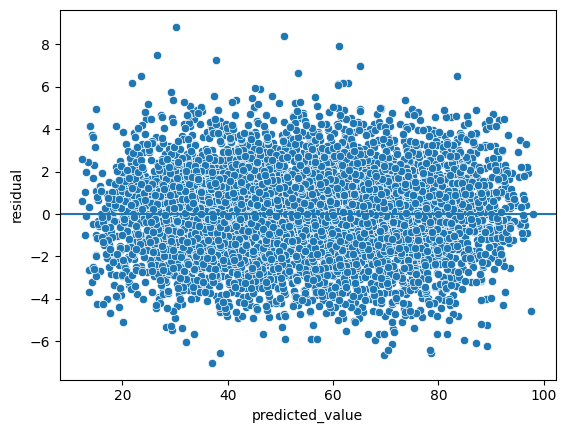

In [45]:
residual = y_df_train - y_predict_train
df_resid = pd.DataFrame({
    'predicted_value': y_predict_train,
    'residual': residual
})

sns.scatterplot(data=df_resid, x="predicted_value", y="residual")
plt.axhline(0)
plt.show()

## Evaluate Model Performance

__Evaluating training error for ridge regression with best lambda__

In [46]:
y_predict_train = ridge_best.predict(X_df_train)

In [47]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for training data is {}'.format(np.sqrt(mean_squared_error(y_df_train, y_predict_train))))
print('MAE for training data is {}'.format(mean_absolute_error(y_df_train, y_predict_train)))
print('MAPE for training data is {}'.format(mean_absolute_percentage_error(y_df_train, y_predict_train)))

RMSE for training data is 2.040589269912996
MAE for training data is 1.6238459080624243
MAPE for training data is 0.034788925458135986


1. The RMSE training error is good because RMSE value is low if we compare with target values2. MAE and MAPE are good, because its under 10%, and we can say that the model is not underfitting

__Evaluating training error for lasso regression with best lambda__

In [48]:
y_predict_train = lasso_best.predict(X_df_train)

In [49]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for training data is {}'.format(np.sqrt(mean_squared_error(y_df_train, y_predict_train))))
print('MAE for training data is {}'.format(mean_absolute_error(y_df_train, y_predict_train)))
print('MAPE for training data is {}'.format(mean_absolute_percentage_error(y_df_train, y_predict_train)))

RMSE for training data is 2.0407008173932675
MAE for training data is 1.6239326749310172
MAPE for training data is 0.03478895792648002


1. The RMSE training error is good because RMSE value is low if we compare with the target values
2. MAE and MAPE training error are good, because its under 20%, higher lil bit than testing error and we can say this model is not underfitting

__Evaluating testing error for ridge regression with best lambda__

In [50]:
# prepare prediction result on test data
X_df_test = feature_df_test.to_numpy()
y_predict_test = ridge_best.predict(X_df_test)

# ground truth target
y_df_test = target_df_test.to_numpy()
y_df_test = y_df_test.reshape(len(y_df_test),)

In [51]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for testing data is {}'.format(np.sqrt(mean_squared_error(y_df_test, y_predict_test))))
print('MAE for testing data is {}'.format(mean_absolute_error(y_df_test, y_predict_test)))
print('MAPE for testing data is {}'.format(mean_absolute_percentage_error(y_df_test, y_predict_test)))

RMSE for testing data is 2.074273266943455
MAE for testing data is 1.6464460356866573
MAPE for testing data is 0.035047446095635267


1. The RMSE testing error is good because RMSE value is low if we compare with target values
2. MAE and MAPE are good, because its under 10%, and we can say that the model Just Right

__Evaluating testing error for lasso regression with best lambda__

In [52]:
# prepare prediction result on test data
X_df_test = feature_df_test.to_numpy()
y_predict_test = lasso_best.predict(X_df_test)

# ground truth target
y_df_test = target_df_test.to_numpy()
y_df_test = y_df_test.reshape(len(y_df_test),)

In [53]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for testing data is {}'.format(np.sqrt(mean_squared_error(y_df_test, y_predict_test))))
print('MAE for testing data is {}'.format(mean_absolute_error(y_df_test, y_predict_test)))
print('MAPE for testing data is {}'.format(mean_absolute_percentage_error(y_df_test, y_predict_test)))

RMSE for testing data is 2.0754738596512894
MAE for testing data is 1.6474984577304326
MAPE for testing data is 0.03507719406646653


1. The RMSE testing error is good because RMSE value is low if we compare with target value
2. MAE and MAPE are good, because its under 20%, lower than training training error (not overfitting), and we can say that the model Just Right

# TRY THE MODEL

In [57]:
Kevin = pd.DataFrame(
    {
        'Hours Studied' : [9],
        'Previous Scores' : [88],
        'Extracurricular Activities' : [0],
        'Sleep Hours' : [9],
        'Sample Question Papers Practiced' : [4]
    }

)
Kevin

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
0,9,88,0,9,4


In [58]:
print('Student Performance Index:', lasso_best.predict(Kevin))

Student Performance Index: [86.33122411]


In [56]:
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,1,4,2,23.0
9996,7,64,1,8,5,58.0
9997,6,83,1,8,5,74.0
9998,9,97,1,7,0,95.0
